In [1]:
import matplotlib.pyplot as plt
plt.style.use('classic')

In [2]:
%matplotlib inline
import numpy as np

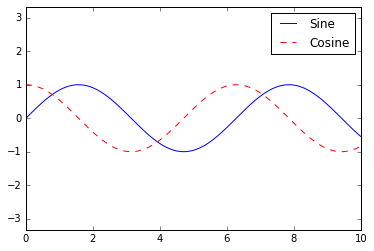

In [3]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
ax.legend()

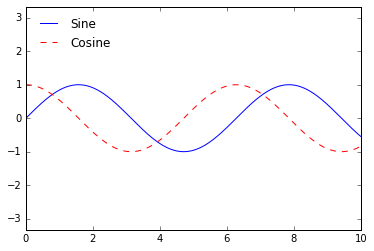

In [4]:
ax.legend(loc='upper left', frameon=False)
fig

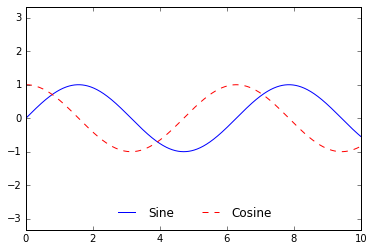

In [5]:
ax.legend(loc='lower center', frameon=False, ncol=2)
fig

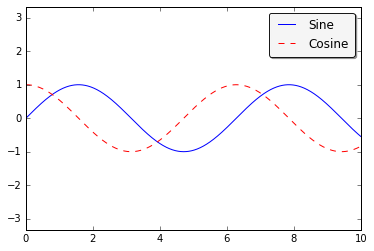

In [6]:
ax.legend(fancybox=True, framealpha=0.9, shadow=True, borderpad=0.5)
fig

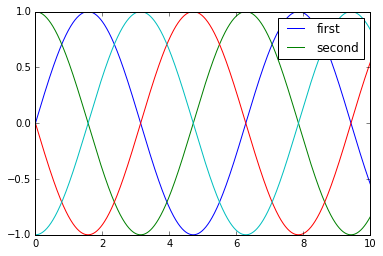

In [27]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)
# matplotlib.lines.Line2D
plt.legend(lines[:], ['first', 'second'])
lines

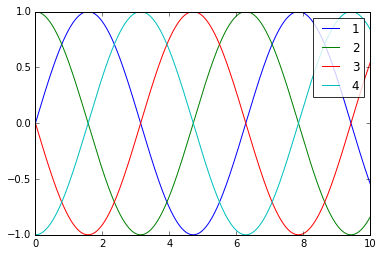

In [20]:
plt.plot(x, y[:, 0], label='1')
plt.plot(x, y[:, 1], label='2')
plt.plot(x, y[:, 2], label='3')
plt.plot(x, y[:, 3], label='4')
plt.legend(framealpha=0.8, frameon=True)

In [30]:
import pandas as pd

# !curl -O 'https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/california_cities.csv'
cities = pd.read_csv('california_cities.csv').drop('Unnamed: 0', axis=1)
cities.head()

,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01


Text(0.5, 1.0, 'California Cities: Area and Population')

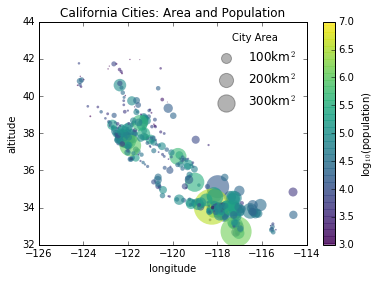

In [37]:
latd, longd = cities['latd'], cities['longd']
pop, area = cities['population_total'], cities['area_total_km2']

plt.scatter(longd, latd, label=None,
           c=np.log10(pop), cmap='viridis',
           s=area, linewidths=0, alpha=0.6)
plt.axis(aspect='equal')
plt.xlabel('longitude')
plt.ylabel('altitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

for area in [100, 200, 300]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
               label=str(area) + 'km$^2$')
plt.legend(scatterpoints=1, frameon=False,
          labelspacing=0.6, title='City Area')
plt.title('California Cities: Area and Population')

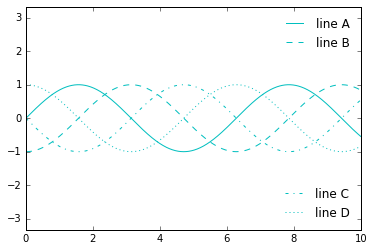

In [39]:
# more than single picture
fig, ax = plt.subplots()

lines = []
style = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2),
                    style[i], c='c')
ax.axis('equal')

# first figure
ax.legend(lines[:2], ['line A', 'line B'],
         loc='upper right', frameon=False)
# second figure
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'],
            loc='lower right', frameon=False)
ax.add_artist(leg)